### This code identifies the regions of the genome that are completely differentially methylated between those with high DNA damage and low reported damage

Code modified...
First, we will do this with the COMET data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:

# Read in COMET beta values
high_comet_vals = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/highCOMETData.csv")
low_comet_vals = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/lowCOMETData.csv")
high_comet_vals.iloc[:]
low_comet_vals.iloc[:]


In [4]:
gene_info = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/SubsettingCPGs/COMET/regionorganizerCOMET.txt",sep='\t',header=0)
gene_info.iloc[:]

,CHR,START,STOP,CG,REGION
0,chr14,93581139,93581140,cg05451842,chr14_93580037_93581568
1,chr15,79170388,79170389,cg09261072,chr15_79168669_79170389
2,chr16,2526495,2526496,cg02404579,chr16_2525928_2526496
3,chr12,12849159,12849160,cg13417420,chr12_12848516_12849444
4,chr1,156048214,156048215,cg12406992,chr1_156046344_156048215
...,...,...,...,...,...
123526,chr3,43146780,43146781,cg00008665,chr3_43146780_43147713
123527,chr2,143044057,143044058,cg23753006,chr2_143044057_143044292
123528,chr11,2464970,2464971,cg23267890,chr11_2464822_2465951
123529,chr1,121260727,121260728,cg14409823,chr1_121259813_121261078


In [25]:
result = {}
count = 0

for index in gene_info.index:
    key = gene_info.iloc[index,4]
    value = gene_info.iloc[index,3]

    if key not in result:
        result[key] = [value]
    else:    
        result[key].append(value)

print(len(result))

25305


In [35]:
high_comet_vals = high_comet_vals.rename(columns = {'Unnamed: 0':"cpgSite"})
high_comet_vals = high_comet_vals.set_index('cpgSite')

Now we want to loop through our dictionry and extract the mean beta values for every ID.
We will do this for the high COMET ID's, and then low COMET ID's, then later compare the mean values.

In [ ]:
# Calculates the mean beta value for all HIGH COMET samples at all promoters
high_comet_df=pd.DataFrame()
count = 0


for key in result:
    count += 1
    beta_key = high_comet_vals.loc[result[key],:]
    high_comet_df[key] = (np.mean(beta_key))
    print("Finished",count,"/",len(result))

high_comet_df.iloc[:]

Here we are rearranging the dataframe and pivoting the columns into rows

In [30]:
highCOMET_mean_betas = high_comet_df.mean(axis=0)
highCOMET_mean_betas = highCOMET_mean_betas.to_frame()
highCOMET_mean_betas.columns = ['Mean_of_betas_high_COMET']
highCOMET_mean_betas.iloc[:]

,Mean_of_betas_high_COMET
chr14_93580037_93581568,0.104010
chr15_79168669_79170389,0.128419
chr16_2525928_2526496,0.345752
chr12_12848516_12849444,0.089405
chr1_156046344_156048215,0.244729
...,...
chr19_40677099_40677100,0.118570
chr1_143194518_143194519,0.109094
chr17_25399269_25399270,0.468490
chr11_51411541_51411542,0.067830


In [32]:
low_comet_vals = low_comet_vals.rename(columns = {'Unnamed: 0':"cpgSite"})
low_comet_vals = low_comet_vals.set_index('cpgSite')

In [ ]:
# Calculates the mean beta value for all low COMET samples at all promoters
low_comet_df=pd.DataFrame()
count = 0
for key in result:
    count += 1
    beta_key = low_comet_vals.loc[result[key],:]
    low_comet_df[key] = (np.mean(beta_key))
    print("Finished",count,"/",len(result))
low_comet_df.iloc[:]

In [ ]:
lowCOMET_mean_betas = low_comet_df.mean(axis=0)
lowCOMET_mean_betas = lowCOMET_mean_betas.to_frame()
lowCOMET_mean_betas.columns = ['Mean_of_betas_low_COMET']
lowCOMET_mean_betas.iloc[:]

In [39]:
all_betas = pd.merge(highCOMET_mean_betas,lowCOMET_mean_betas,left_index=True,right_index=True)
all_betas["Delta"] = all_betas.Mean_of_betas_high_COMET - all_betas.Mean_of_betas_low_COMET
all_betas = all_betas.sort_values(by=["Delta"],ascending=False)
all_betas.iloc[:]

,Mean_of_betas_high_COMET,Mean_of_betas_low_COMET,Delta
chr3_176080292_176080293,0.494314,0.272113,0.222201
chr13_42657684_42657685,0.396907,0.175234,0.221673
chr19_36795950_36795951,0.398312,0.196907,0.201405
chr4_126113206_126113207,0.385149,0.199934,0.185216
chr8_18525381_18525382,0.305690,0.123649,0.182041
...,...,...,...
chr14_65175225_65175333,0.732852,0.854109,-0.121256
chr20_19890605_19890641,0.724154,0.847074,-0.122920
chr22_38572439_38572457,0.705110,0.833897,-0.128786
chr6_7975374_7975375,0.646449,0.797404,-0.150955


In [54]:
high_hcomet_low_lcomet_methylation = []
high_lcomet_low_hcomet_methylation = []
large_delta = []
for promoter in all_betas.index:
    sample = all_betas.loc[promoter,"Delta"]
    if sample > 0.16:
        large_delta.append(promoter)
        high_hcomet_low_lcomet_methylation.append(promoter)
    if sample < -0.16:
        large_delta.append(promoter)
        high_lcomet_low_hcomet_methylation.append(promoter)

print(len(large_delta))
print(len(high_hcomet_low_lcomet_methylation))
print(len(high_lcomet_low_hcomet_methylation))

high_hcomet_low_lcomet_methylation_deltas = all_betas.loc[high_hcomet_low_lcomet_methylation,:]
high_hcomet_low_lcomet_methylation_deltas = high_hcomet_low_lcomet_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_hcomet_low_lcomet_methylation_deltas.iloc[:]

high_lcomet_low_hcomet_methylation_deltas = all_betas.loc[high_lcomet_low_hcomet_methylation,:]
high_lcomet_low_hcomet_methylation_deltas = high_lcomet_low_hcomet_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_lcomet_low_hcomet_methylation_deltas.iloc[:]

significant_regions = all_betas.loc[large_delta,:]
significant_regions.iloc[:]
        

43
42
1


,Mean_of_betas_high_COMET,Mean_of_betas_low_COMET,Delta
chr3_176080292_176080293,0.494314,0.272113,0.222201
chr13_42657684_42657685,0.396907,0.175234,0.221673
chr19_36795950_36795951,0.398312,0.196907,0.201405
chr4_126113206_126113207,0.385149,0.199934,0.185216
chr8_18525381_18525382,0.305690,0.123649,0.182041
chr13_85779237_85779238,0.372332,0.193470,0.178862
chr9_92983726_92983727,0.366294,0.189230,0.177064
chr6_162444494_162444495,0.326723,0.151483,0.175240
chr14_54859664_54859665,0.245167,0.072462,0.172705
chr16_86903449_86903492,0.277321,0.105487,0.171833


In [55]:
significant_regions.to_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/SubsettingCPGs/COMET/COMET_DMR_Regions.csv")

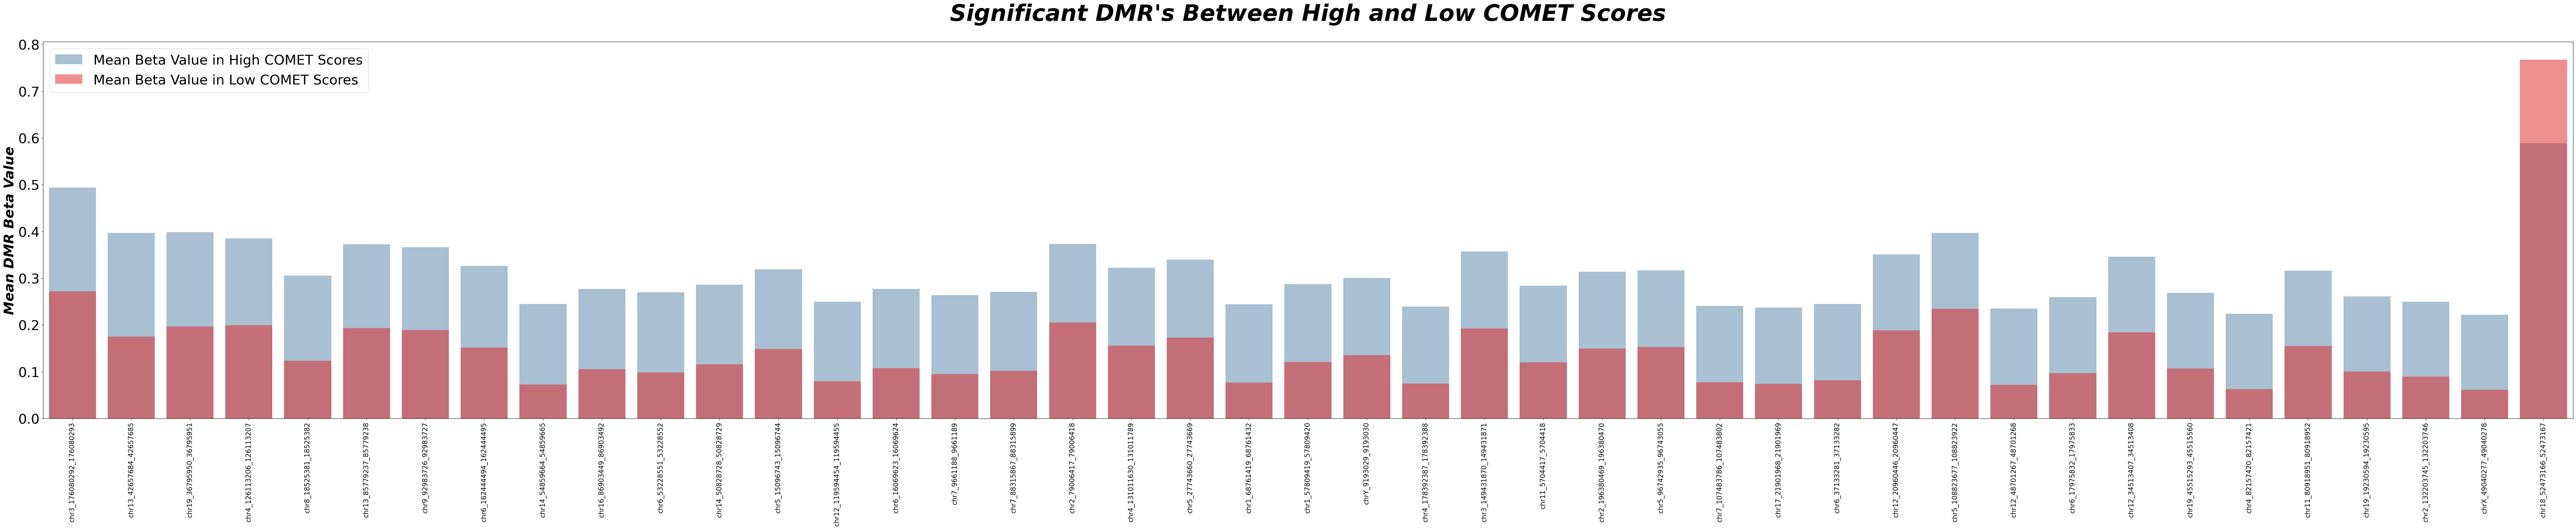

<Figure size 640x480 with 0 Axes>

In [56]:
# barplot
plt.figure(figsize=(100,15))
sns.barplot(data=significant_regions,x=significant_regions.index,y='Mean_of_betas_high_COMET',color='steelblue',label='Mean Beta Value in High COMET Scores',alpha = .5)
sns.barplot(data=significant_regions,x=significant_regions.index,y='Mean_of_betas_low_COMET',color = 'red', label='Mean Beta Value in Low COMET Scores',alpha = .5)
plt.legend(fontsize=30)
plt.title("Significant DMR's Between High and Low COMET Scores",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

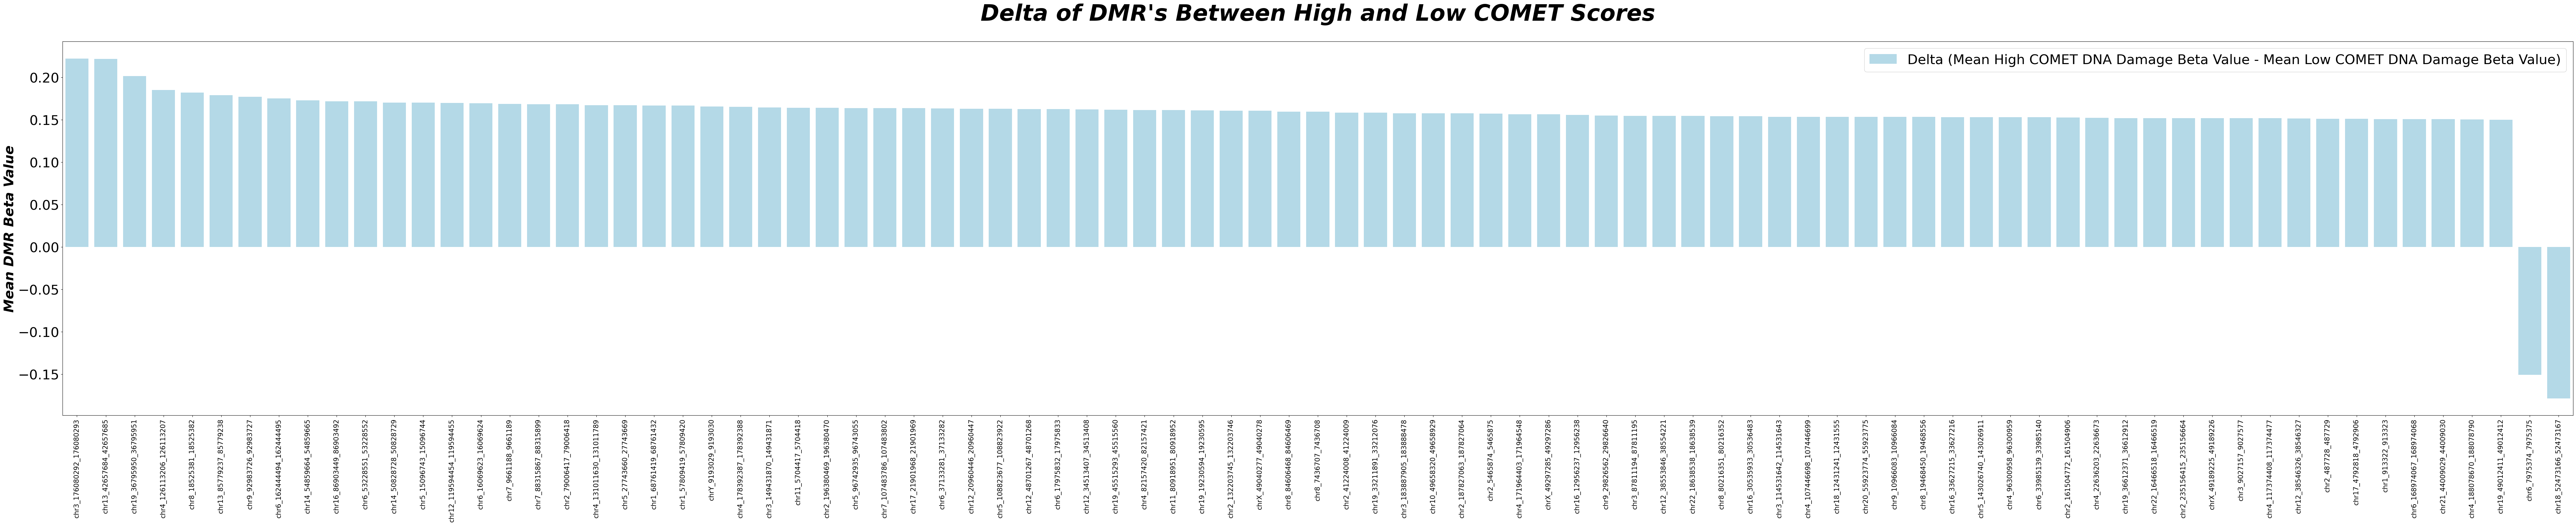

<Figure size 640x480 with 0 Axes>

In [51]:
# barplot
plt.figure(figsize=(100,15))
sns.barplot(data=significant_regions,x=significant_regions.index,y='Delta',color = 'skyblue',alpha = .7,label='Delta (Mean High COMET DNA Damage Beta Value - Mean Low COMET DNA Damage Beta Value)')
plt.legend(fontsize=30)
plt.title("Delta of DMR's Between High and Low COMET Scores",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

In [ ]:
#Plotting all Significant DMR
high_comet_regions = high_comet_df.loc[:,large_delta]
high_comet_regions = pd.DataFrame(high_comet_regions)
high_comet_regions["COMET"] = "high COMET"
high_comet_regions.iloc[:]

low_comet_regions = low_comet_df.loc[:,large_delta]
low_comet_regions = pd.DataFrame(low_comet_regions)
low_comet_regions["COMET"] = "low COMET"
low_comet_regions.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(high_comet_regions)
combined_region = combined_region.append(low_comet_regions)
# dlk1 = pd.append(blood_dlk1) maybe later?
combined_region.iloc[:]

for i in large_delta:
    # boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(data=combined_region,x='COMET',y=i,palette="Dark2_r")
    plt.title(i)
    plt.ylabel("Mean Beta Value ",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
    plt.xlabel("")
    plt.xticks(rotation = 90, fontsize = 12)
    plt.savefig("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/Figures/magic/" + i + '.png', dpi=500)
    # plt.show()
    plt.clf()

# Yay!
Now its time to do all that agin for DFI!! YAY


First, set up data

In [2]:
# Read in COMET beta values
high_dfi_vals = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/highDFIData.csv")
low_dfi_vals = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/lowDFIData.csv")
high_dfi_vals.iloc[:]
low_dfi_vals.iloc[:]

gene_info = pd.read_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/SubsettingCPGs/DFI/regionorganizerDFI.txt",sep='\t',header=0)
gene_info.iloc[:]

#Fix the first column to set CpG's as rows
high_dfi_vals = high_dfi_vals.rename(columns = {'Unnamed: 0':"cpgSite"})
high_dfi_vals = high_dfi_vals.set_index('cpgSite')

low_dfi_vals = low_dfi_vals.rename(columns = {'Unnamed: 0':"cpgSite"})
low_dfi_vals = low_dfi_vals.set_index('cpgSite')

In [3]:
result = {}
count = 0

for index in gene_info.index:
    key = gene_info.iloc[index,4]
    value = gene_info.iloc[index,3]

    if key not in result:
        result[key] = [value]
    else:    
        result[key].append(value)

print(len(result))

6684


In [ ]:
# Calculates the mean beta value for all HIGH COMET samples at all promoters
high_dfi_df=pd.DataFrame()
count = 0


for key in result:
    count += 1
    beta_key = high_dfi_vals.loc[result[key],:]
    high_dfi_df[key] = (np.mean(beta_key))
    print("Finished",count,"/",len(result))

high_dfi_df.iloc[:]

highDFI_mean_betas = high_dfi_df.mean(axis=0)
highDFI_mean_betas = highDFI_mean_betas.to_frame()
highDFI_mean_betas.columns = ['Mean_of_betas_high_DFI']
highDFI_mean_betas.iloc[:]

In [ ]:
# Calculates the mean beta value for all low COMET samples at all promoters
low_dfi_df=pd.DataFrame()
count = 0
for key in result:
    count += 1
    beta_key = low_dfi_vals.loc[result[key],:]
    low_dfi_df[key] = (np.mean(beta_key))
    print("Finished",count,"/",len(result))
low_dfi_df.iloc[:]

lowDFI_mean_betas = low_dfi_df.mean(axis=0)
lowDFI_mean_betas = lowDFI_mean_betas.to_frame()
lowDFI_mean_betas.columns = ['Mean_of_betas_low_DFI']
lowDFI_mean_betas.iloc[:]

In [9]:
all_betas = pd.merge(highDFI_mean_betas,lowDFI_mean_betas,left_index=True,right_index=True)
all_betas["Delta"] = all_betas.Mean_of_betas_high_DFI - all_betas.Mean_of_betas_low_DFI
all_betas = all_betas.sort_values(by=["Delta"],ascending=False)
all_betas.iloc[:]

,Mean_of_betas_high_DFI,Mean_of_betas_low_DFI,Delta
chr17_62304934_62304935,0.545529,0.452938,0.092591
chr13_64315383_64315384,0.203850,0.123804,0.080046
chr18_73016766_73016767,0.279850,0.202425,0.077425
chr4_132655659_132655660,0.261835,0.186144,0.075691
chr4_183684723_183684724,0.546516,0.471154,0.075361
...,...,...,...
chr2_145226929_145226930,0.111919,0.193198,-0.081280
chr19_54516973_54516974,0.267348,0.363890,-0.096542
chr20_60713905_60713906,0.397420,0.513555,-0.116136
chrX_46458622_46458623,0.477551,0.594191,-0.116640


In [10]:
high_hdfi_low_ldfi_methylation = []
high_ldfi_low_hdfi_methylation = []
large_delta = []
for promoter in all_betas.index:
    sample = all_betas.loc[promoter,"Delta"]
    if sample > 0.07:
        large_delta.append(promoter)
        high_hdfi_low_ldfi_methylation.append(promoter)
    if sample < -0.07:
        large_delta.append(promoter)
        high_ldfi_low_hdfi_methylation.append(promoter)

print(len(large_delta))
print(len(high_hdfi_low_ldfi_methylation))
print(len(high_ldfi_low_hdfi_methylation))

high_hdfi_low_ldfi_methylation_deltas = all_betas.loc[high_hdfi_low_ldfi_methylation,:]
high_hdfi_low_ldfi_methylation_deltas = high_hdfi_low_ldfi_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_hdfi_low_ldfi_methylation_deltas.iloc[:]

high_ldfi_low_hdfi_methylation_deltas = all_betas.loc[high_ldfi_low_hdfi_methylation,:]
high_ldfi_low_hdfi_methylation_deltas = high_ldfi_low_hdfi_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_ldfi_low_hdfi_methylation_deltas.iloc[:]

significant_regions = all_betas.loc[large_delta,:]
significant_regions.iloc[:]

significant_regions.to_csv("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/SubsettingCPGs/DFI/DFI_DMR_Regions.csv")

17
11
6


In [14]:
print(significant_regions)

                           Mean_of_betas_high_DFI  Mean_of_betas_low_DFI  \
chr17_62304934_62304935                  0.545529               0.452938   
chr13_64315383_64315384                  0.203850               0.123804   
chr18_73016766_73016767                  0.279850               0.202425   
chr4_132655659_132655660                 0.261835               0.186144   
chr4_183684723_183684724                 0.546516               0.471154   
chr5_168368909_168368910                 0.616633               0.541382   
chr4_132677681_132677682                 0.215283               0.140956   
chr16_49802060_49802299                  0.439525               0.365479   
chr8_29344567_29344600                   0.548029               0.474170   
chr4_132650897_132650898                 0.377295               0.304424   
chr4_132661931_132661962                 0.236306               0.165438   
chr15_102041142_102041143                0.705937               0.777269   
chr2_1452269

# Time to plot our DMR's... :)

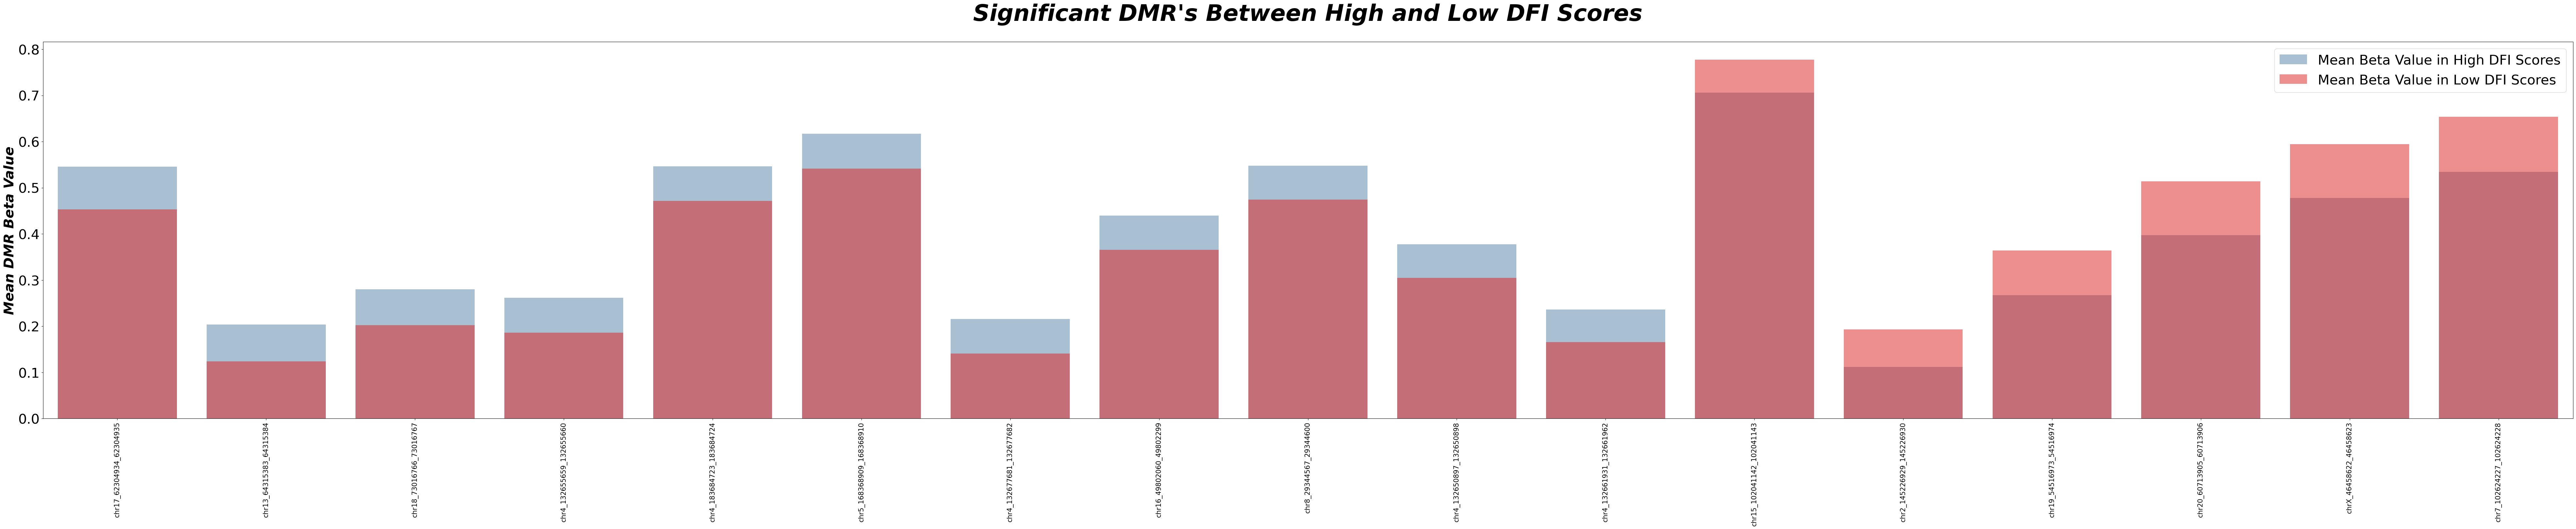

<Figure size 640x480 with 0 Axes>

In [11]:
# barplot 1- all means with a color difference
plt.figure(figsize=(100,15))
sns.barplot(data=significant_regions,x=significant_regions.index,y='Mean_of_betas_high_DFI',color='steelblue',label='Mean Beta Value in High DFI Scores',alpha = .5)
sns.barplot(data=significant_regions,x=significant_regions.index,y='Mean_of_betas_low_DFI',color = 'red', label='Mean Beta Value in Low DFI Scores',alpha = .5)
plt.legend(fontsize=30)
plt.title("Significant DMR's Between High and Low DFI Scores",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

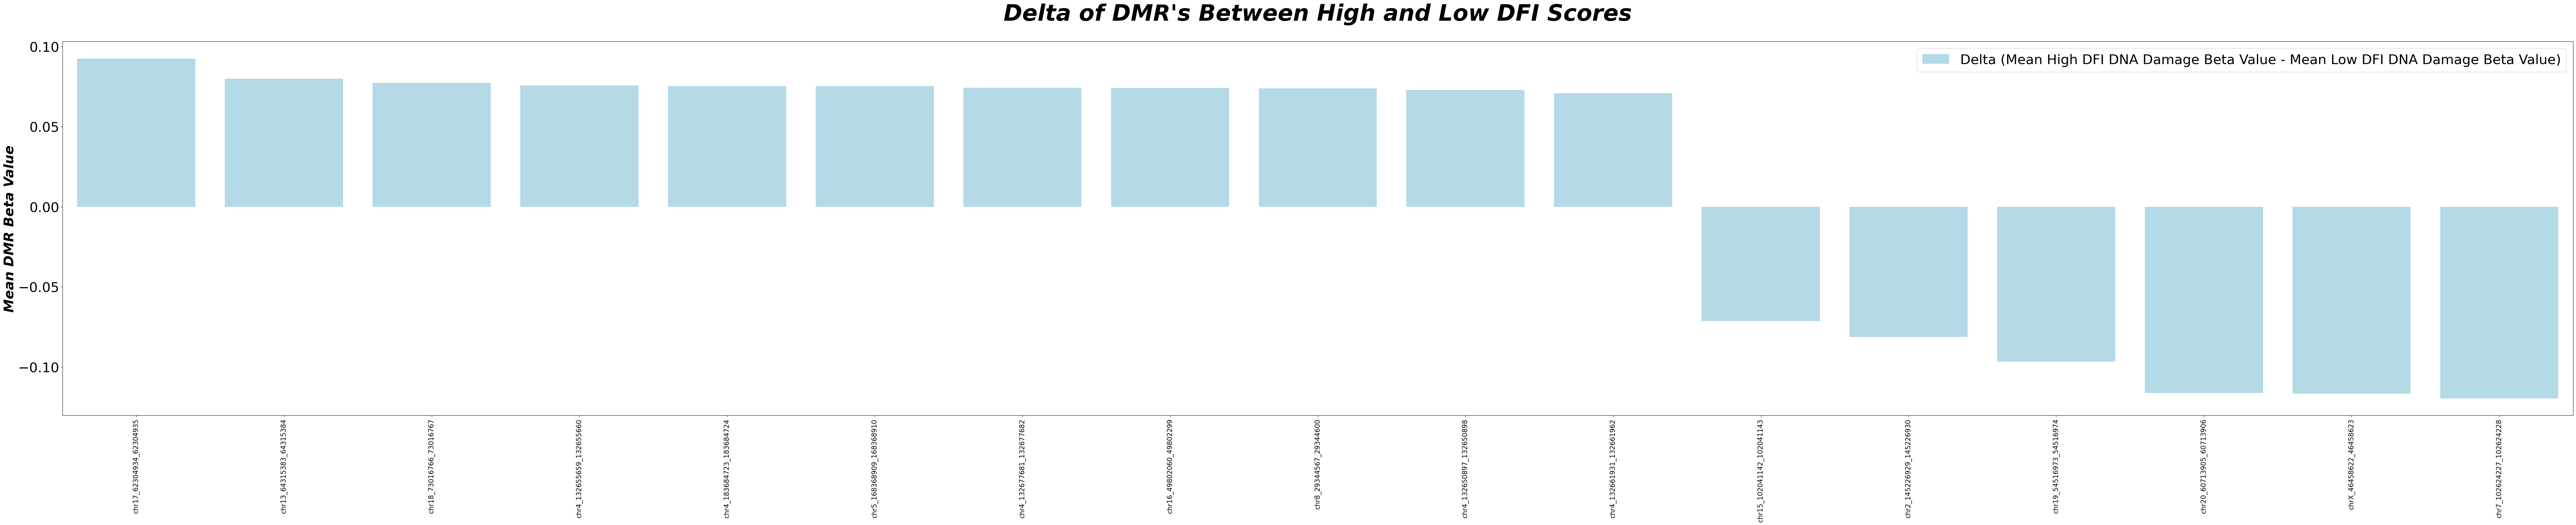

<Figure size 640x480 with 0 Axes>

In [12]:
# barplot 2- absolute difference plot
plt.figure(figsize=(100,15))
sns.barplot(data=significant_regions,x=significant_regions.index,y='Delta',color = 'skyblue',alpha = .7,label='Delta (Mean High DFI DNA Damage Beta Value - Mean Low DFI DNA Damage Beta Value)')
plt.legend(fontsize=30)
plt.title("Delta of DMR's Between High and Low DFI Scores",fontdict= {'fontsize': 50, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.05)
plt.ylabel("Mean DMR Beta Value",fontdict= {'fontsize': 30, 'fontweight':'bold','fontstyle':'italic','color':'black'})
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 30)
plt.show()
plt.clf()

In [ ]:
#Plotting all individual Significant DMR
high_dfi_regions = high_dfi_df.loc[:,large_delta]
high_dfi_regions = pd.DataFrame(high_dfi_regions)
high_dfi_regions["DFI"] = "high DFI"
high_dfi_regions.iloc[:]

low_dfi_regions = low_dfi_df.loc[:,large_delta]
low_dfi_regions = pd.DataFrame(low_dfi_regions)
low_dfi_regions["DFI"] = "low DFI"
low_dfi_regions.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(high_dfi_regions)
combined_region = combined_region.append(low_dfi_regions)
# dlk1 = pd.append(blood_dlk1) maybe later?
combined_region.iloc[:]

for i in large_delta:
    # boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(data=combined_region,x='DFI',y=i,palette="Dark2_r")
    plt.title(i)
    plt.ylabel("Mean Beta Value ",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
    plt.xlabel("")
    plt.xticks(rotation = 90, fontsize = 12)
    plt.savefig("/Users/jenkinslab/Desktop/FAZSTProject/DNA_Damage_Project/Figures/magicbut4DFI/" + i + '.png', dpi=500)
    # plt.show()
    plt.clf()

In [ ]:

# Looking at Looking at significant sites in Bulk Tissue

In [38]:
beta_values_data_1 =  pd.read_csv("/Volumes/Research_Data/Research_Datasets/Whole_Blood/Alzheimers_Whole_Blood_450K/betas_with_missing_cgs.csv",header=0,index_col=0)
beta_values_data_1.iloc[:]

,GSM4299202,GSM4299203,GSM4299204,GSM4299205,GSM4299206,GSM4299207,GSM4299208,GSM4299209,GSM4299210,GSM4299211,...,GSM4299655,GSM4299656,GSM4299657,GSM4299658,GSM4299659,GSM4299660,GSM4299661,GSM4299662,GSM4299663,GSM4299664
cg00000029,0.610080,0.461774,0.532801,0.525638,0.565315,0.552355,0.527146,0.547243,0.372868,0.615915,...,0.484418,0.617885,0.561003,0.496887,0.580232,0.535366,0.498475,0.540064,0.550954,0.530547
cg00000108,0.892013,0.874571,0.864435,0.888415,0.876623,0.877342,0.890696,0.889398,0.904566,0.859725,...,0.882659,0.885742,0.886964,0.864362,0.876606,0.901069,0.887756,0.874309,0.883725,0.877415
cg00000109,0.679462,0.743489,0.750426,0.766076,0.719490,0.701337,0.732295,0.732074,0.785893,0.697565,...,0.753637,0.723688,0.779231,0.755308,0.716716,0.775408,0.741219,0.696181,0.705243,0.701283
cg00000165,0.380888,0.315226,0.408930,0.363258,0.355817,0.366407,0.391705,0.324435,0.341246,0.355870,...,0.358236,0.382305,0.463078,0.394118,0.445603,0.361730,0.385927,0.387760,0.354690,0.419075
cg00000236,0.746092,0.692648,0.703013,0.729159,0.727424,0.699636,0.705997,0.733631,0.758436,0.716815,...,0.711934,0.691133,0.679940,0.677763,0.663610,0.690712,0.728422,0.735839,0.630362,0.735451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.22.23746271F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.22.317144R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.22.569473R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.22.728807R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_info_data_1 = pd.read_csv("/Volumes/Research_Data/Research_Datasets/Whole_Blood/Alzheimers_Whole_Blood_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_data_1.iloc[:4,:]

,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1.1,...,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_state,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count,!series_matrix_table_begin,ID_REF
Genomic DNA from blood 1,GSM4299202,Public on Nov 18 2020,Feb 06 2020,Nov 18 2020,genomic,1,whole blood,Homo sapiens,tissue: whole blood,Sex: Female,...,University of Exeter,"RILD South, Barrack Road",Exeter,Devon,EX2 5DW,United Kingdom,NONE,410942,NaN,GSM4299202
Genomic DNA from blood 2,GSM4299203,Public on Nov 18 2020,Feb 06 2020,Nov 18 2020,genomic,1,whole blood,Homo sapiens,tissue: whole blood,Sex: Male,...,University of Exeter,"RILD South, Barrack Road",Exeter,Devon,EX2 5DW,United Kingdom,NONE,410942,NaN,GSM4299203
Genomic DNA from blood 3,GSM4299204,Public on Nov 18 2020,Feb 06 2020,Nov 18 2020,genomic,1,whole blood,Homo sapiens,tissue: whole blood,Sex: Female,...,University of Exeter,"RILD South, Barrack Road",Exeter,Devon,EX2 5DW,United Kingdom,NONE,410942,NaN,GSM4299204
Genomic DNA from blood 4,GSM4299205,Public on Nov 18 2020,Feb 06 2020,Nov 18 2020,genomic,1,whole blood,Homo sapiens,tissue: whole blood,Sex: Male,...,University of Exeter,"RILD South, Barrack Road",Exeter,Devon,EX2 5DW,United Kingdom,NONE,410942,NaN,GSM4299205


In [ ]:
# Calculates the mean beta value for all samples at all significant regions
neuron_df_data_1=pd.DataFrame()
for key in result:
    beta_key = beta_values_data_1.loc[result[key],:]
    neuron_df_data_1[key] = (np.mean(beta_key))

In [ ]:
plot_data = pd.merge(sample_info_data_1,neuron_df_data_1.loc[:,large_delta],left_index=True,right_index=True)
plot_data.iloc[:]

In [ ]:
for i in large_delta:
    # boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(data=plot_data,x='Cell_Type',y=i,palette="Dark2_r")
    # plt.title("Endometriosis vs. Healthy",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
    plt.title(i)
    plt.ylabel("Mean Beta Value",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
    plt.xlabel("")
    plt.xticks(rotation = 90, fontsize = 12)
    # plt.xticks([])
    plt.savefig("/Volumes/Research_Data/My_Github/Resonant/Alzheimers_Project/Neurons_vs_Blood_Plasma/DMR_Figures_Bulk_Tissue/" + i + '.png', dpi=500)
    plt.show()
    plt.clf()

In [ ]:
# Looking at significant sites in Whole Blood Alzheimers Patients

In [ ]:
beta_values_data_2 =  pd.read_csv("/Volumes/Research_Data/Research_Datasets/Brain_Tissue/Alzheimers_MTG_450K/Alzheimers_MTG_450K_beta_values.csv",header=0,index_col=0)
beta_values_data_2.iloc[:]

In [ ]:
sample_info_data_2 = pd.read_csv("/Volumes/Research_Data/Research_Datasets/Brain_Tissue/Alzheimers_MTG_450K/sample_sheet.csv",header=0,index_col=0)
sample_info_data_2.iloc[:4,:]

In [ ]:
# Calculates the mean beta value for all samples at all significant regions
neuron_df_data_2=pd.DataFrame()
count = 0
for key in result:
    count += 1
    beta_key = beta_values_data_2.loc[result[key],:]
    neuron_df_data_2[key] = (np.mean(beta_key))
    #print("Done with",count, "/", len(result))

    eft_index=True,right_index=True
    .loc[:,large_delta]

In [ ]:
low_dfi_regions = low_dfi_regions.rename(columns = {'index':"cpgSite"})
low_dfi_regions = low_dfi_regions.set_index('cpgSite')

high_dfi_regions = high_dfi_regions.rename(columns = {'index':"cpgSite"})
high_dfi_regions = high_dfi_regions.set_index('cpgSite')
plot_data = pd.merge(high_dfi_regions,low_dfi_regions)
plot_data.iloc[:]

In [ ]:
for i in large_delta:
    # boxplot
    plt.figure(figsize=(10,10))
    sns.boxplot(data=plot_data,x='Cell_Type',y=i,palette="Dark2_r")
    # plt.title("Endometriosis vs. Healthy",fontdict= {'fontsize': 20, 'fontweight':'bold','fontstyle':'italic','color':'black'},y =1.01)
    plt.title(i)
    plt.ylabel("Mean Beta Value",fontdict= {'fontsize': 12, 'fontweight':'bold','fontstyle':'italic','color':'black'})
    plt.xlabel("")
    plt.xticks(rotation = 90, fontsize = 12)
    # plt.xticks([])
    #plt.savefig("/Volumes/Research_Data/My_Github/Resonant/Alzheimers_Project/Neurons_vs_Blood_Plasma/DMR_Figures_Bulk_Tissue/" + i + '.png', dpi=500)
    plt.show()
    plt.clf()